##  libraries needed 

In [1]:
import pandas as pd
import numpy as np
import random

# we'll want this for plotting
import matplotlib.pyplot as plt
import seaborn as sns


#preprocessing
import re
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')


#modling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
%matplotlib inline


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maramabdullah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



## Step 1: Reading the data


In [6]:
# read the data from csv file 
data= pd.read_csv("gender_classfication.csv")

In [7]:
# represent the first 5 rows of dataset 
data.head()

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,gender,gender_confidence,profile_yn,profile_yn_confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,2015-10-26T23:24:00,male,1.0000,True,1.0,2013-12-05T01:48:00,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,2015-10-26T12:40:00,658730000000000000,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,2015-10-26T23:30:00,male,1.0000,True,1.0,2012-10-01T13:51:00,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,���It felt like they were my friends and I was...,NaN,7471,2015-10-26T12:40:00,658730000000000000,NaN,Eastern Time (US & Canada)
2,815719236,False,finalized,3,2015-10-26T23:17:00,brand,0.7002,True,1.0,2011-11-16T17:14:00,...,https://pbs.twimg.com/profile_images/653518467...,0,C0DEED,how are you taking care of yourself? https://t...,NaN,5179,2015-10-26T12:40:00,658730000000000000,New York,Atlantic Time (Canada)
3,815719326,False,finalized,3,2015-10-26T23:09:00,female,1.0000,True,1.0,2012-07-23T22:34:00,...,https://pbs.twimg.com/profile_images/651146254...,0,C0DEED,The accuracy though lol https://t.co/frFforEeLC,NaN,5244,2015-10-26T12:40:00,658730000000000000,NaN,NaN
4,815720233,False,finalized,3,2015-10-27T00:27:00,unknown,0.6792,True,1.0,2009-12-29T13:33:00,...,https://pbs.twimg.com/profile_images/656886222...,0,FFFFFF,the force awakens even if he comes out on dec ...,NaN,33149,2015-10-26T12:40:00,658730000000000000,kylo ren' sidekick,Brussels


In [8]:
# rows and columens 
data.shape

(20050, 26)

In [9]:
# print all columens name with related information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
unit_id                  20050 non-null int64
golden                   20050 non-null bool
unit_state               20050 non-null object
trusted_judgments        20050 non-null int64
last_judgment_at         20000 non-null object
gender                   19953 non-null object
gender_confidence        20024 non-null float64
profile_yn               20050 non-null bool
profile_yn_confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text      

In [10]:
data.columns

Index(['unit_id', 'golden', 'unit_state', 'trusted_judgments',
       'last_judgment_at', 'gender', 'gender_confidence', 'profile_yn',
       'profile_yn_confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [11]:
data.describe() #You can look at summary of numerical fields by using describe() function

,unit_id,trusted_judgments,gender_confidence,profile_yn_confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


## Step 2: Cleaning the data
- Create a bar chart showing how many missing values are in each column
- Which column has the most NaN values? How many cells in that column are empty?

Note: NaN, empty, and missing are synonymous.

In [12]:
# check null values 
data.isnull().sum()

unit_id                      0
golden                       0
unit_state                   0
trusted_judgments            0
last_judgment_at            50
gender                      97
gender_confidence           26
profile_yn                   0
profile_yn_confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7491
user_timezone             7798
dtype: int64

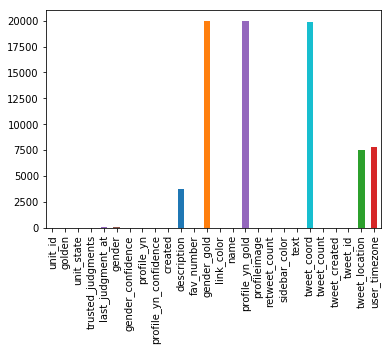

In [13]:
# plot bar chart showing how many missing values are in each column
data.isnull().sum().plot(kind="bar");

In [10]:


# value in our target 
data.gender.value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [11]:
# remove brand and unknown from target 
data=data[data['gender']!= 'brand']
data=data[data['gender']!='unknown']

In [12]:
# to check 
data.gender.value_counts()

female    6700
male      6194
Name: gender, dtype: int64

In [13]:
#fill null 
values = {'description':' no description',
         'text':'',
         'gender_gold':"",
          'profile_yn_gold':'',
          'gender:confidence':'',
          '_last_judgment_at':'',
          'tweet_location':'',
          'user_timezone':'',
          'tweet_coord':''  
         }
data.fillna(value=values,inplace=True)

In [14]:

#drop nulls 
data.dropna(inplace=True)

In [15]:
#data.drop('gender_gold', axis=1, inplace=True)

In [16]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    s = s.replace('ù'," ")
    s = s.replace('ü'," ")
    s  = s.replace('òit'," ")
    s  = s.replace('å'," ")
    s  = s.replace('û'," ")  
    return s

data['Tweets'] = [cleaning(s) for s in data['text']]
data['Description'] = [cleaning(s) for s in data['description']]


stop = set(stopwords.words('english'))
data['Tweets'] = data['Tweets'].str.lower().str.split()
data['Tweets'] = data['Tweets'].apply(lambda x : [item for item in x if item not in stop])

In [17]:
data.columns

Index(['unit_id', 'golden', 'unit_state', 'trusted_judgments',
       'last_judgment_at', 'gender', 'gender_confidence', 'profile_yn',
       'profile_yn_confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone',
       'Tweets', 'Description'],
      dtype='object')

In [18]:
data['Tweets']

0        [robbie, e, responds, critics, win, eddie, edw...
1        [felt, like, friends, living, story, arngeyhno...
3                      [accuracy, though, lol, frfforeelc]
5               [sarahgbass, said, talk, rachel, actually]
7        [mplete, swoof, sphinx, wonder, build, ultimat...
8           [opejani, fa, cup, final, league, cup, aswell]
9        [one, way, ticket, place, demons, go, wind, ch...
10       [patriotic, eyeglass, holder, chain, set, knit...
11       [low, key, miss, high, school, dominican, hous...
12       [going, see, sos, belgium, still, follow, proj...
13       [junckereu, martinschulz, good, friend, erdoga...
14       [number, crunching, past, day, new, followers,...
16       [roommate, listening, beyonc, ncert, crimping,...
17                       [musicsgf, next, dog, name, stop]
18       [hilton, steak, wine, gooooooooood, fun, puawiro]
19       [getting, sent, tropical, lyme, disease, speci...
20       [enjoying, last, lunch, together, drives, next.

In [19]:
Male = data[data['gender'] == 'male']
Female = data[data['gender'] == 'female']
Male_Words = pd.Series(' '.join(Male['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Female_Words = pd.Series(' '.join(Female['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]


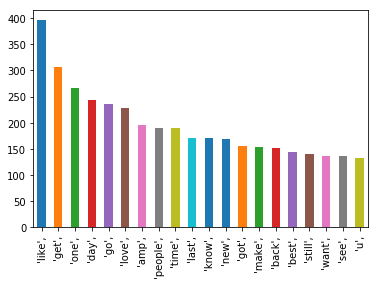

In [20]:

Female_Words.plot(kind='bar',stacked=True)

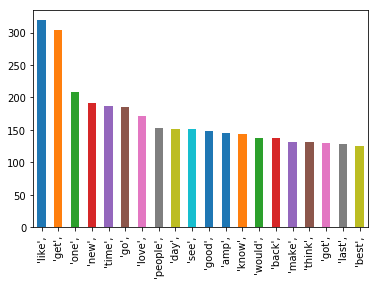

In [21]:
Male_Words.plot(kind='bar',stacked=True)

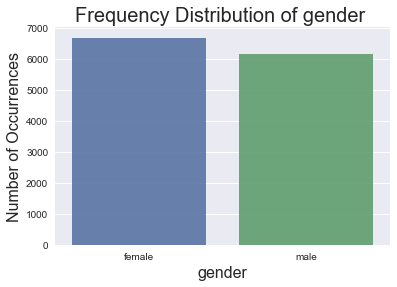

In [22]:
#shows the frequency distribution of the gender column
gender_count = data.gender.value_counts()
sns.set(style="darkgrid")
sns.barplot(gender_count.index, gender_count.values, alpha=0.9)
plt.title('Frequency Distribution of gender ',fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('gender', fontsize=16)
plt.show()

In [23]:
# check  
len(data.sidebar_color.unique())

419

In [24]:
data=data.drop(['text','unit_id','description','profileimage','gender_confidence',
                'created','tweet_id','Tweets', 'Description'], axis = 1)

In [25]:
data.tweet_created.value_counts()

2015-10-26T12:40:00    4829
2015-10-26T13:19:00    4204
2015-10-26T13:20:00    2584
2015-10-26T12:39:00    1024
2015-10-26T13:18:00     217
Name: tweet_created, dtype: int64

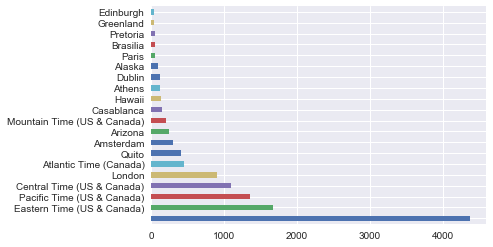

In [26]:
#shows the frequency distribution of the gender column
data.user_timezone.value_counts()[:20].plot(kind='barh');

In [27]:
data.columns

Index(['golden', 'unit_state', 'trusted_judgments', 'last_judgment_at',
       'gender', 'profile_yn', 'profile_yn_confidence', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'retweet_count',
       'sidebar_color', 'tweet_coord', 'tweet_count', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

## Step 4 : preprocessing
- convert catgorical varibles before modling 
- using LabelEncoder() for target 
- using get_dummies for features

In [28]:
#convert target by using LabelEncoder
le = preprocessing.LabelEncoder()
le.fit(data.gender)
le.classes_  
y=le.transform(data.gender)

print(max(pd.Series(y).value_counts(normalize=True)))

0.5199097837921917


In [29]:
le.classes_  

array(['female', 'male'], dtype=object)

In [33]:
def dummie_non_numeric(df):
    non_numeric_cols = list(set(df.columns)-set(df._get_numeric_data().sum().index))
    dummies = pd.get_dummies(df[non_numeric_cols])
    new = pd.concat([df, dummies],axis=1)
    return new

data=dummie_non_numeric(data)


##  Step 5 : features selection 

In [34]:
# comment tfidf vectorization
#s_color=pd.get_dummies(data.sidebar_color,prefix='s'). iloc[:,1:]
#l_color=pd.get_dummies(data.link_color, prefix='l'). iloc[:,1:]
#data=pd.concat([data,s_color],axis=1)
#data=pd.concat([data,l_color],axis=1)
# define our Features and target 
features=data.drop(['gender','sidebar_color','link_color','unit_state','last_judgment_at','name',
                    'gender_gold','profile_yn_gold','tweet_coord','tweet_created','tweet_location',
                    'user_timezone','golden','profile_yn','profile_yn_confidence',
                    'female','male'], axis=1)
labels = y
# train test split 
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 0)


In [35]:
features.iloc[:,20:].head()

,name_0nlyonthursdays,name_0nlyyyHER_,name_1000Jasus,name_1001coupons,name_1010xl_T_Wigg,name_108AmyJ,name_10_manhood,name_10printhelloweb,name_10stopphoto,name_11Ashcroft,...,link_color_FFB700,link_color_FFB8F5,link_color_FFBAE1,link_color_FFC7F4,link_color_FFCBA4,link_color_FFCC4D,link_color_FFCCCC,link_color_FFD5BA,link_color_FFD700,link_color_FFFFFF
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
features.columns

Index(['trusted_judgments', 'fav_number', 'retweet_count', 'tweet_count',
       'tweet_created_2015-10-26T12:39:00',
       'tweet_created_2015-10-26T12:40:00',
       'tweet_created_2015-10-26T13:18:00',
       'tweet_created_2015-10-26T13:19:00',
       'tweet_created_2015-10-26T13:20:00', 'name_0154_GUTIERREZ',
       ...
       'link_color_FFB700', 'link_color_FFB8F5', 'link_color_FFBAE1',
       'link_color_FFC7F4', 'link_color_FFCBA4', 'link_color_FFCC4D',
       'link_color_FFCCCC', 'link_color_FFD5BA', 'link_color_FFD700',
       'link_color_FFFFFF'],
      dtype='object', length=42618)

In [37]:
features.shape

(12858, 42618)

In [38]:
print(pd.Series(y).value_counts())

0    6685
1    6173
dtype: int64


In [39]:
# Standrized features 
ss = StandardScaler()
data_ss = ss.fit_transform(features)

## Step 6 : Modling 

In [41]:
# create list contain of classfication models 
models = [
    RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    LinearSVC(),
]

CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.987480
RandomForestClassifier    0.955041
Name: accuracy, dtype: float64

### Models Accuracy Plot

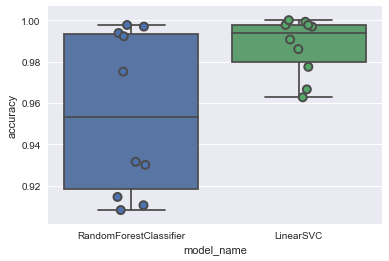

In [42]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
svc_roc_auc = roc_auc_score(y_test,model.predict(X_test))

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,model.predict(X_test))
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % svc_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Linear SVC model 

In [43]:
#Create a RandomForest Classifier
SVC=LinearSVC() 
#Train the model using the training sets y_pred=clf.predict(X_test)
SVC.fit(X_train,y_train)

y_pred=SVC.predict(X_test)

In [44]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.9957231726283048


## Step 7: Model Evaluation

In [45]:
print(metrics.classification_report(y_test, y_pred, target_names=data['gender'].unique()))

             precision    recall  f1-score   support

       male       1.00      0.99      1.00      1384
     female       0.99      1.00      1.00      1188

avg / total       1.00      1.00      1.00      2572

